# Import important libraries

In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
#from datetime import datetime


seed=42

# Load the dataset

In [4]:
#Read the csv file
df = pd.read_csv('/content/Final_nflx_data_2018-2022.csv')
df['date'] = pd.to_datetime(df['date'])
df

,date,Open,High,Low,Close,Adj Close,Volume,P_mean,P_sum,twt_count
0,2018-01-02,196.100006,201.649994,195.419998,201.070007,201.070007,10966900,0.020833,10,480
1,2018-01-03,202.050003,206.210007,201.500000,205.050003,205.050003,8591400,0.071217,24,337
2,2018-01-04,206.199997,207.050003,204.000000,205.630005,205.630005,6029600,-0.018519,-4,216
3,2018-01-05,207.250000,210.020004,205.589996,209.990005,209.990005,7033200,-0.019737,-6,304
4,2018-01-08,210.020004,212.500000,208.440002,212.050003,212.050003,5580200,-0.007663,-2,261
...,...,...,...,...,...,...,...,...,...,...
1132,2022-07-01,176.490005,180.100006,174.270004,179.949997,179.949997,5194700,-0.062315,-21,337
1133,2022-07-05,176.279999,185.919998,172.679993,185.880005,185.880005,7334300,-0.058824,-25,425
1134,2022-07-06,185.199997,186.220001,180.820007,184.059998,184.059998,5753400,-0.014870,-8,538
1135,2022-07-07,184.270004,190.210007,183.500000,189.270004,189.270004,6334500,-0.055427,-24,433


## Understanding the time Series

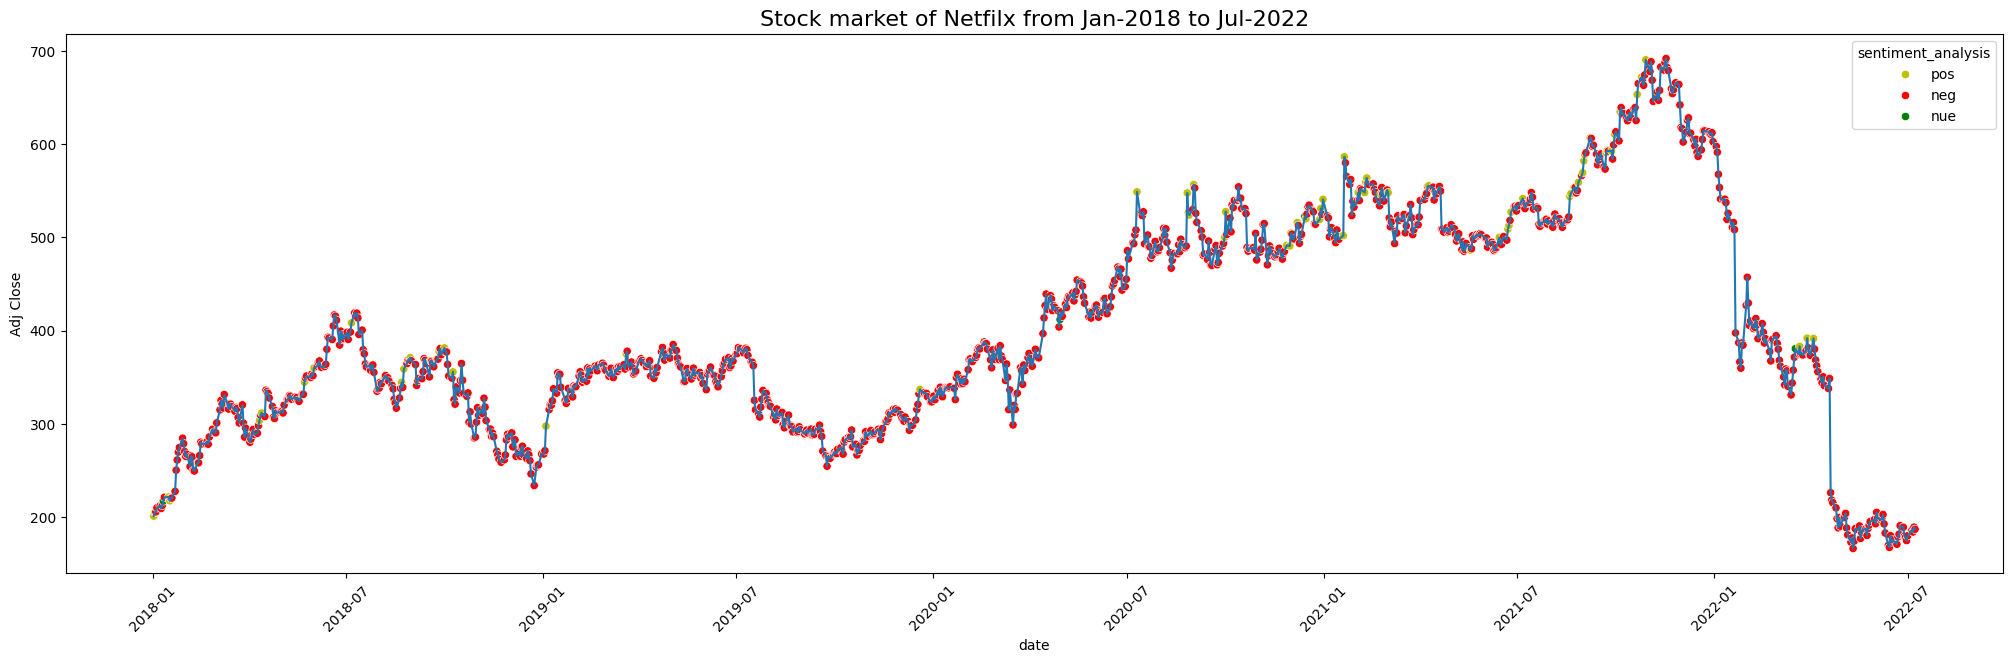

In [ ]:
import seaborn as sns
plt.figure(figsize=(25,7));
sns.lineplot(x=df["date"],y=df["Adj Close"])
df['sentiment_analysis']=df['P_mean']
df['sentiment_analysis']=df['sentiment_analysis'].apply(lambda x: 'pos' if x>0 else 'nue' if x==0 else 'neg')
sns.scatterplot(x=df["date"],y=df['Adj Close'],hue=df['sentiment_analysis'],palette=['y','r','g'])
plt.xticks(rotation=45);
plt.title("Stock market of Netfilx from Jan-2018 to Jul-2022",fontsize=16);

In [5]:
df=df.drop(list(range(14)),axis=0,inplace=False)
df

,date,Open,High,Low,Close,Adj Close,Volume,P_mean,P_sum,twt_count
14,2018-01-23,255.050003,257.709991,248.020004,250.289993,250.289993,27705300,-0.061196,-88,1438
15,2018-01-24,250.880005,261.709991,249.309998,261.299988,261.299988,17352400,-0.084525,-65,769
16,2018-01-25,263.000000,272.299988,260.230011,269.700012,269.700012,15336400,-0.122744,-102,831
17,2018-01-26,271.489990,274.600006,268.760010,274.600006,274.600006,11021800,-0.118012,-57,483
18,2018-01-29,274.200012,286.809998,273.920013,284.589996,284.589996,17529700,-0.100690,-73,725
...,...,...,...,...,...,...,...,...,...,...
1132,2022-07-01,176.490005,180.100006,174.270004,179.949997,179.949997,5194700,-0.062315,-21,337
1133,2022-07-05,176.279999,185.919998,172.679993,185.880005,185.880005,7334300,-0.058824,-25,425
1134,2022-07-06,185.199997,186.220001,180.820007,184.059998,184.059998,5753400,-0.014870,-8,538
1135,2022-07-07,184.270004,190.210007,183.500000,189.270004,189.270004,6334500,-0.055427,-24,433


In [5]:
train_dates = pd.to_datetime(df['date'])
# print(train_dates.tail(15)) #Check last few dates.

#Variables for training
cols = [
    'Open',
    'High', 'Low',
    'Close',
    'Volume',
    'Adj Close',
    'P_mean',
        ]
#Date and volume columns are not used in training.
print(cols)

#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)
df_for_training.index=df['date']
df_for_training

['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'P_mean']


,Open,High,Low,Close,Volume,Adj Close,P_mean
date,,,,,,,
2018-01-02,196.100006,201.649994,195.419998,201.070007,10966900.0,201.070007,0.020833
2018-01-03,202.050003,206.210007,201.500000,205.050003,8591400.0,205.050003,0.071217
2018-01-04,206.199997,207.050003,204.000000,205.630005,6029600.0,205.630005,-0.018519
2018-01-05,207.250000,210.020004,205.589996,209.990005,7033200.0,209.990005,-0.019737
2018-01-08,210.020004,212.500000,208.440002,212.050003,5580200.0,212.050003,-0.007663
...,...,...,...,...,...,...,...
2022-07-01,176.490005,180.100006,174.270004,179.949997,5194700.0,179.949997,-0.062315
2022-07-05,176.279999,185.919998,172.679993,185.880005,7334300.0,185.880005,-0.058824
2022-07-06,185.199997,186.220001,180.820007,184.059998,5753400.0,184.059998,-0.014870


In [6]:
scaler = MinMaxScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

scaler_for_inference = MinMaxScaler()
scaler_for_inference.fit_transform(df_for_training.loc[:,['Open','Adj Close']])

df_for_training_scaled
# df_for_training_scaled=df_for_training.copy()
# df_for_training_scaled=df_for_training_scaled.to_numpy()

array([[0.06082629, 0.05594312, 0.06249759, ..., 0.07427889, 0.066055  ,
        0.8357873 ],
       [0.0720869 , 0.06456433, 0.07411439, ..., 0.05631581, 0.07363132,
        0.98677344],
       [0.07994094, 0.06615243, 0.07889104, ..., 0.03694397, 0.07473542,
        0.71785961],
       ...,
       [0.04019756, 0.02677103, 0.03460201, ..., 0.0348554 , 0.03367472,
        0.72879365],
       [0.03843751, 0.03431458, 0.03972256, ..., 0.03924957, 0.04359249,
        0.60725335],
       [0.04174946, 0.03374739, 0.03828956, ..., 0.03544446, 0.03923323,
        0.6444625 ]])

In [7]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 5  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future,[0,-2]])

trainX, trainY = np.array(trainX), np.array(trainY)

print('TrainX shape = {}.'.format(trainX.shape))
print('TrainY shape = {}.'.format(trainY.shape))

TrainX shape = (1132, 5, 7).
TrainY shape = (1132, 1, 2).


In [8]:
from sklearn.model_selection import train_test_split

X_train_lstm_without_twitter, X_test_lstm_without_twitter, y_train_lstm_without_twitter, y_test_lstm_without_twitter = train_test_split(trainX[:,:,:-1], trainY, test_size=0.2, shuffle=False)

X_train_lstm_twitter, X_test_lstm_twitter, y_train_lstm_twitter, y_test_lstm_twitter = train_test_split(trainX, trainY, test_size=0.2, shuffle=False)

X_train_lstm_without_twitter.shape,X_train_lstm_twitter.shape

((905, 5, 6), (905, 5, 7))

In [9]:
from sklearn.model_selection import train_test_split

X_train_lstm_without_twitter, X_val_lstm_without_twitter, y_train_lstm_without_twitter, y_val_lstm_without_twitter = train_test_split(X_train_lstm_without_twitter, y_train_lstm_without_twitter, test_size=0.1, shuffle=False)

X_train_lstm_twitter, X_val_lstm_twitter, y_train_lstm_twitter, y_val_lstm_twitter = train_test_split(X_train_lstm_twitter, y_train_lstm_twitter, test_size=0.1, shuffle=False)

X_train_lstm_without_twitter.shape,X_train_lstm_twitter.shape

((814, 5, 6), (814, 5, 7))

# ARIMA

In [13]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 37.5 MB/s eta 0:00:00


## Train test split for Arima

In [10]:
df_arima=df_for_training.copy()
# df_arima['Volume']=df['Volume']
n_past_for_arima=1
adj_close_feature=df_arima['Adj Close']
open_feature=df_arima['Open']
df_arima['Adj Close']=df_arima['Adj Close'].shift(-n_past_for_arima)
df_arima['Open']=df_arima['Open'].shift(-n_past_for_arima)
df_arima.dropna(inplace=True)
df_arima['Adj Close_feature']=adj_close_feature.iloc[:-1]
df_arima['open_feature_feature']=open_feature.iloc[:-1]
# df_arima=df_arima.reindex(columns=['open_lag','High', 'Low', 'Close', 'adj_close_lag','P_mean','Adj Close','Open',])
X_arima=df_arima.drop(['Adj Close','Open'],axis=1)
y_arima=df_arima[['Open','Adj Close']]
X_train_arima_twitter, X_test_arima_twitter, y_train_arima, y_test_arima=train_test_split(X_arima, y_arima, test_size=0.2, shuffle=False)

X_train_arima_without_twitter, X_test_arima_without_twitter= X_train_arima_twitter.drop('P_mean', axis=1), X_test_arima_twitter.drop('P_mean', axis=1)
X_train_arima_without_twitter


,High,Low,Close,Volume,Adj Close_feature,open_feature_feature
date,,,,,,
2018-01-02,201.649994,195.419998,201.070007,10966900.0,201.070007,196.100006
2018-01-03,206.210007,201.500000,205.050003,8591400.0,205.050003,202.050003
2018-01-04,207.050003,204.000000,205.630005,6029600.0,205.630005,206.199997
2018-01-05,210.020004,205.589996,209.990005,7033200.0,209.990005,207.250000
2018-01-08,212.500000,208.440002,212.050003,5580200.0,212.050003,210.020004
...,...,...,...,...,...,...
2021-08-04,517.979980,510.369995,517.349976,2039400.0,517.349976,513.000000
2021-08-05,525.409973,514.020020,524.890015,2556700.0,524.890015,517.130005
2021-08-06,526.840027,519.390015,520.549988,1919800.0,520.549988,524.000000


In [11]:
X_train_arima_twitter

,High,Low,Close,Volume,P_mean,Adj Close_feature,open_feature_feature
date,,,,,,,
2018-01-02,201.649994,195.419998,201.070007,10966900.0,0.020833,201.070007,196.100006
2018-01-03,206.210007,201.500000,205.050003,8591400.0,0.071217,205.050003,202.050003
2018-01-04,207.050003,204.000000,205.630005,6029600.0,-0.018519,205.630005,206.199997
2018-01-05,210.020004,205.589996,209.990005,7033200.0,-0.019737,209.990005,207.250000
2018-01-08,212.500000,208.440002,212.050003,5580200.0,-0.007663,212.050003,210.020004
...,...,...,...,...,...,...,...
2021-08-04,517.979980,510.369995,517.349976,2039400.0,-0.050980,517.349976,513.000000
2021-08-05,525.409973,514.020020,524.890015,2556700.0,-0.036424,524.890015,517.130005
2021-08-06,526.840027,519.390015,520.549988,1919800.0,-0.066351,520.549988,524.000000


In [16]:
!pip uninstall -y numpy pmdarima
!pip install numpy pmdarima --no-cache-dir


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 258.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 269.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [22]:
!pip install numpy==1.23.5
!pip install --no-cache-dir pmdarima


## Arima model to predict open prices

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Convert data to numpy arrays if needed
import numpy as np
y_train = np.array(y_train_arima['Open'])
X_train_without_twitter = np.array(X_train_arima_without_twitter)
X_train_twitter = np.array(X_train_arima_twitter)

# Manually set ARIMA order (try different values)
order = (2, 1, 3)  # (p, d, q)

# Fit ARIMA model without Twitter data
arima_model_for_open_without_twitter = ARIMA(y_train, order=order, exog=X_train_without_twitter).fit()
print(arima_model_for_open_without_twitter.summary())

# Fit ARIMA model with Twitter data
arima_model_for_open_twitter = ARIMA(y_train, order=order, exog=X_train_twitter).fit()
print(arima_model_for_open_twitter.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  908
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -3083.246
Date:                Sun, 30 Mar 2025   AIC                           6190.491
Time:                        13:45:23   BIC                           6248.213
Sample:                             0   HQIC                          6212.533
                                - 908                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2740      0.043      6.409      0.000       0.190       0.358
x2             0.2243      0.045      5.002      0.000       0.136       0.312
x3             0.2444      0.018     13.736      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  908
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -3039.109
Date:                Sun, 30 Mar 2025   AIC                           6104.219
Time:                        13:45:36   BIC                           6166.751
Sample:                             0   HQIC                          6128.098
                                - 908                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2345      0.051      4.639      0.000       0.135       0.334
x2             0.2157      0.053      4.074      0.000       0.112       0.319
x3             0.2364      0.022     10.865      0.0

## Computing training accuracy for open prices

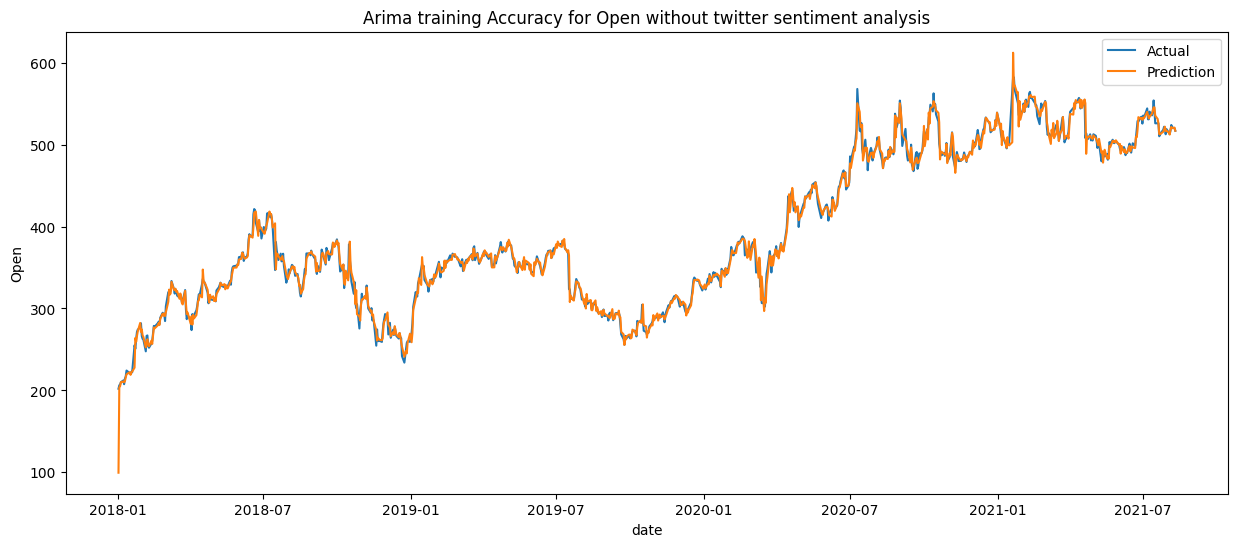

Training mean square error for open feature without twitter 63.90541781533477


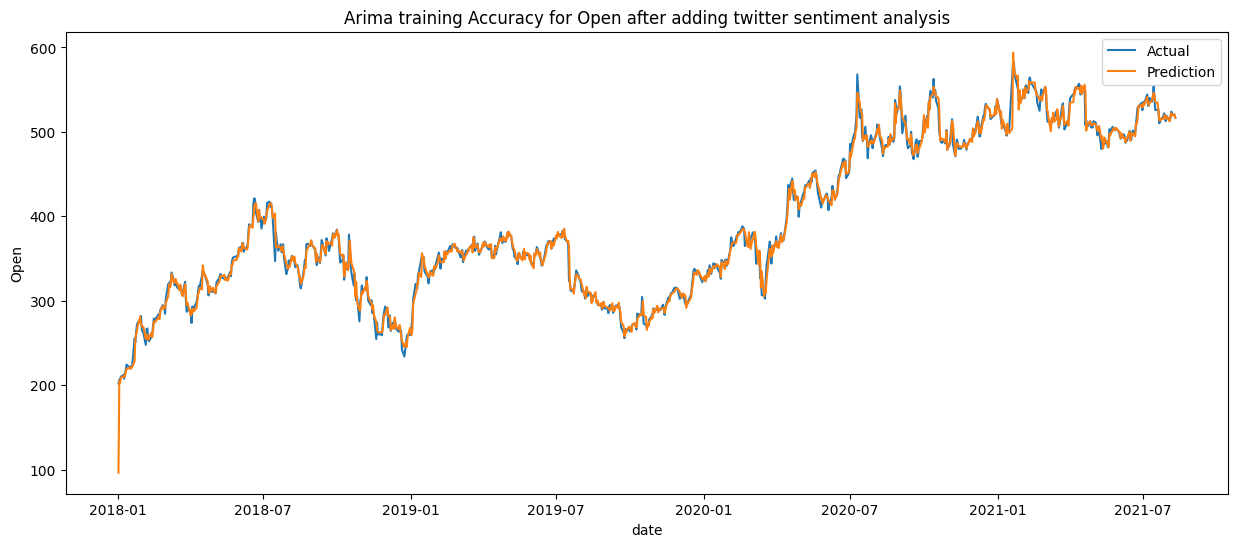

Training mean square error for open feature with twitter 59.88398593657325


In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
train_prediction_without_twitter= arima_model_for_open_without_twitter.predict(n_periods=len(X_train_arima_without_twitter), exogenous=X_train_arima_without_twitter)
train_prediction_twitter= arima_model_for_open_twitter.predict(n_periods=len(X_train_arima_twitter), exogenous=X_train_arima_twitter)
plt.figure(figsize=(15,6))
sns.lineplot(x=y_train_arima['Open'].index, y=y_train_arima['Open'], label='Actual')
sns.lineplot(x=y_train_arima['Open'].index, y=train_prediction_without_twitter, label='Prediction')
plt.title('Arima training Accuracy for Open without twitter sentiment analysis')
plt.show()
e=mean_squared_error(train_prediction_without_twitter, y_train_arima['Open'])
print(f'Training mean square error for open feature without twitter {e}')

plt.figure(figsize=(15,6))
sns.lineplot(x=y_train_arima['Open'].index, y=y_train_arima['Open'], label='Actual')
sns.lineplot(x=y_train_arima['Open'].index, y=train_prediction_twitter, label='Prediction')
plt.title('Arima training Accuracy for Open after adding twitter sentiment analysis')
plt.show()
e=mean_squared_error(train_prediction_twitter, y_train_arima['Open'])
print(f'Training mean square error for open feature with twitter {e}')


## Computing testing accuracy for open prices

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ensure prediction length matches actual test data length
n_periods = len(y_test_arima['Open'])

# Generate predictions
test_prediction_without_twitter = arima_model_for_open_without_twitter.predict(
    n_periods=n_periods, exogenous=X_test_arima_without_twitter
)[:n_periods]  # Trim extra values if necessary

test_prediction_twitter = arima_model_for_open_twitter.predict(
    n_periods=n_periods, exogenous=X_test_arima_twitter
)[:n_periods]  # Trim extra values if necessary

# Convert predictions to numpy arrays (to ensure consistent lengths)
test_prediction_without_twitter = np.array(test_prediction_without_twitter)
test_prediction_twitter = np.array(test_prediction_twitter)

# Ensure y_test_arima['Open'] is also a numpy array
actual_values = np.array(y_test_arima['Open'])


# Calculate error metrics (without Twitter)
mse_without_twitter = mean_squared_error(actual_values, test_prediction_without_twitter)



# Calculate error metrics (with Twitter)
mse_twitter = mean_squared_error(actual_values, test_prediction_twitter)



## Arima model for Adjusted Close prices

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Fit ARIMA Model for Adj Close (Without Twitter)
arima_model_for_Adj_Close_without_twitter = sm.tsa.SARIMAX(
    y_train_arima['Adj Close'],
    exog=X_train_arima_without_twitter,
    order=(2, 1, 3),  # Adjust based on optimal p, d, q values
    seasonal_order=(1, 0, 1, 12),  # Adjust if needed
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

# Fit ARIMA Model for Adj Close (With Twitter)
arima_model_for_Adj_Close_twitter = sm.tsa.SARIMAX(
    y_train_arima['Adj Close'],
    exog=X_train_arima_twitter,
    order=(2, 1, 3),  # Adjust based on optimal p, d, q values
    seasonal_order=(1, 0, 1, 12),  # Adjust if needed
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

# Display model summaries
print(arima_model_for_Adj_Close_without_twitter.summary())
print(arima_model_for_Adj_Close_twitter.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/di

                                      SARIMAX Results                                       
Dep. Variable:                            Adj Close   No. Observations:                  908
Model:             SARIMAX(2, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -3325.322
Date:                              Sun, 30 Mar 2025   AIC                           6678.644
Time:                                      13:51:49   BIC                           6745.737
Sample:                                           0   HQIC                          6704.287
                                              - 908                                         
Covariance Type:                                opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
High                     0.1223      0.079      1.553      0.120      -0.032  

## Computing training accuracy for Adjusted Close prices

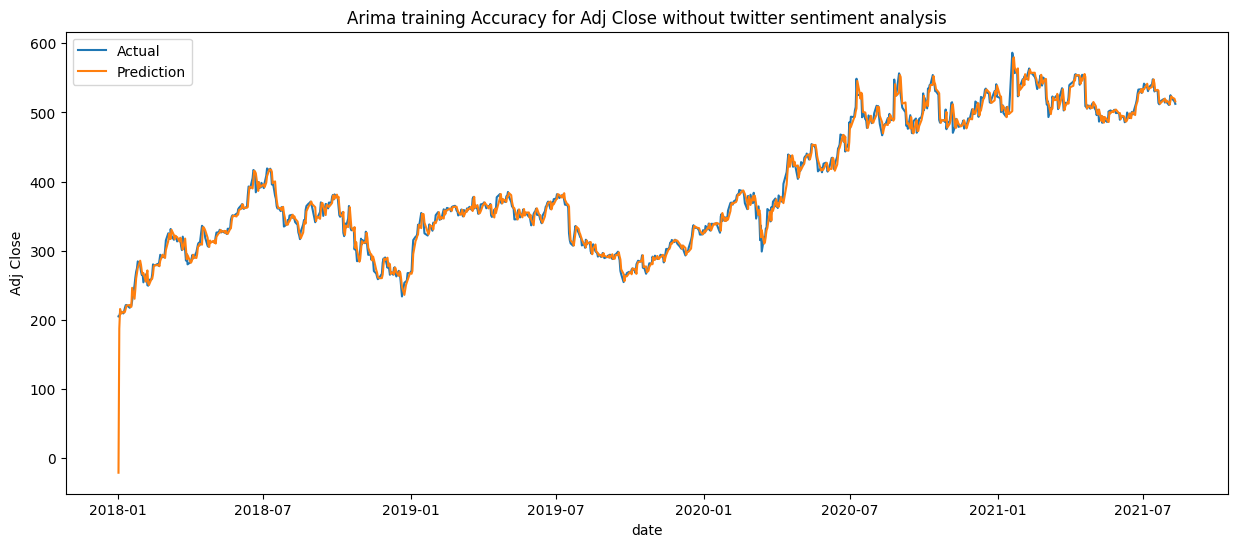

Training mean absolute error for Adj Close feature without twitter 158.3180112888755


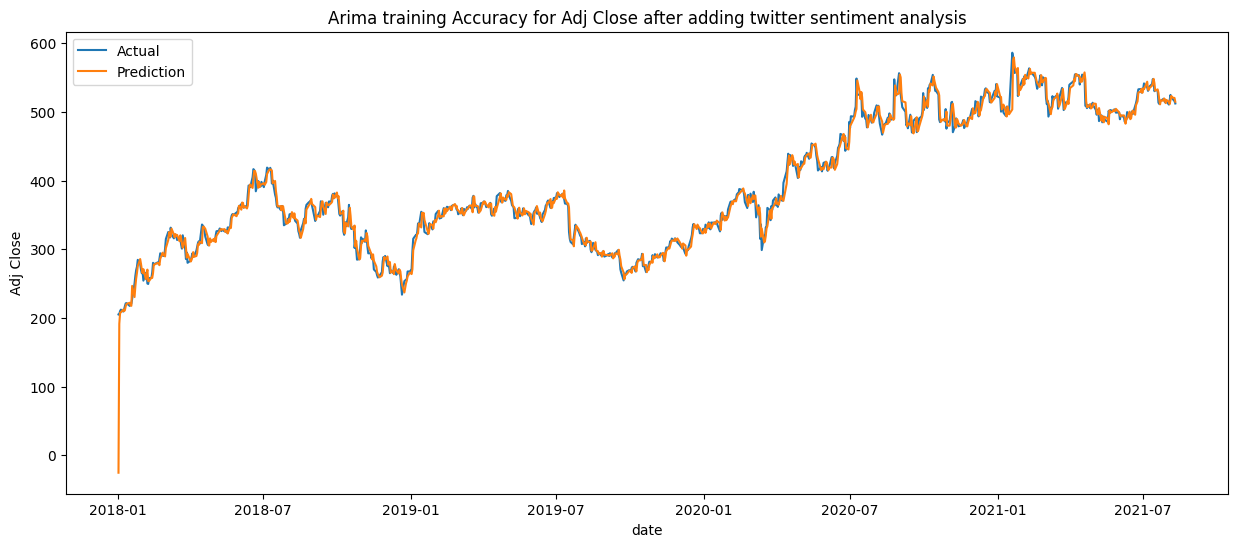

Training mean absolute error for Adj Close feature with twitter 158.41842257674332


In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
train_prediction_without_twitter= arima_model_for_Adj_Close_without_twitter.predict(n_periods=len(X_train_arima_without_twitter), exogenous=X_train_arima_without_twitter)
train_prediction_twitter= arima_model_for_Adj_Close_twitter.predict(n_periods=len(X_train_arima_twitter), exogenous=X_train_arima_twitter)
plt.figure(figsize=(15,6))
sns.lineplot(x=y_train_arima['Adj Close'].index, y=y_train_arima['Adj Close'], label='Actual')
sns.lineplot(x=y_train_arima['Adj Close'].index, y=train_prediction_without_twitter, label='Prediction')
plt.title('Arima training Accuracy for Adj Close without twitter sentiment analysis')
plt.show()
e=mean_squared_error(train_prediction_without_twitter, y_train_arima['Adj Close'])
print(f'Training mean absolute error for Adj Close feature without twitter {e}')

plt.figure(figsize=(15,6))
sns.lineplot(x=y_train_arima['Adj Close'].index, y=y_train_arima['Adj Close'], label='Actual')
sns.lineplot(x=y_train_arima['Adj Close'].index, y=train_prediction_twitter, label='Prediction')
plt.title('Arima training Accuracy for Adj Close after adding twitter sentiment analysis')
plt.show()
e=mean_squared_error(train_prediction_twitter, y_train_arima['Adj Close'])
print(f'Training mean absolute error for Adj Close feature with twitter {e}')


## Computing testing accuracy for Adjusted close prices

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Generate test predictions using correct indices
test_prediction_without_twitter = arima_model_for_Adj_Close_without_twitter.predict(
    start=len(y_train_arima),
    end=len(y_train_arima) + len(y_test_arima) - 1,
    exog=X_test_arima_without_twitter
)

test_prediction_twitter = arima_model_for_Adj_Close_twitter.predict(
    start=len(y_train_arima),
    end=len(y_train_arima) + len(y_test_arima) - 1,
    exog=X_test_arima_twitter
)




/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [26]:
test_prediction_twitter

,predicted_mean
908,513.934844
909,515.172038
910,512.994482
911,515.192368
912,513.477632
...,...
1131,558.370112
1132,557.701593
1133,556.391783
1134,558.843167


# Forcasting for upcoming data

In [27]:
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past_dates = 5
n_days_for_prediction = 5 #let us predict past 15 days

predict_period_dates = pd.date_range(list(df_for_training.index)[-n_past_dates], periods=n_days_for_prediction,
                                     freq=us_bd).tolist()
print(predict_period_dates)

[Timestamp('2022-07-01 00:00:00'), Timestamp('2022-07-05 00:00:00'), Timestamp('2022-07-06 00:00:00'), Timestamp('2022-07-07 00:00:00'), Timestamp('2022-07-08 00:00:00')]


In [28]:
features= ['Open','High', 'Low','Close','Volume','Adj Close','P_mean']
df_for_training.iloc[-n_past:,:].to_numpy().reshape(1,n_past,len(features)).shape

(1, 5, 7)

### Actual forcasting in 2022-07-07 are  open 184.27     adjusted close 189.27

## Forcasting for upcoming data using Arima

In [ ]:
x_forcast=X_arima[X_arima.index =='2022-07-07']
x_forcast

,High,Low,Close,Volume,P_mean,Adj Close_feature,open_feature_feature
date,,,,,,,
2022-07-07,190.210007,183.5,189.270004,6334500.0,-0.055427,189.270004,184.270004


In [ ]:
x_forcast=X_arima[X_arima.index =='2022-07-07']
open_prediction = arima_model_for_open_twitter.predict(n_periods=len(x_forcast), exogenous=x_forcast)
adj_close_prediction = arima_model_for_Adj_Close_twitter.predict(n_periods=len(x_forcast),exogenous=x_forcast)#shape = (n, 1) where n is the n_days_for_prediction
# open_prediction=float(open_prediction)
# adj_close_prediction=float(adj_close_prediction)
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

print(f'Date = {forecast_dates[-2]}, Prediction open {open_prediction[0]}')
print(f'Date = {forecast_dates[-2]}, Prediction Adjusted close {adj_close_prediction[0]}')

Date = 2022-07-07, Prediction open 189.0882665010385
Date = 2022-07-07, Prediction Adjusted close 188.45417344048107


C:\Users\Kirolos\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Kirolos\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### Actual for 2022-07-07  forcasting  open 184.27     adjusted close 189.27